In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
mac_donalds_data = pd.read_csv('mcdonalds.csv')

In [3]:
#Variable Names
mac_donalds_data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
#Shape
mac_donalds_data.shape

(1453, 15)

##### Observation
- 1453 is the no. of data points
- 15 is the no. of features / columns

In [5]:
mac_donalds_data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


##### Observation
- We can see that the first person in our dataset, <b> aged 61 </b> doesn't like the food <b> (-3) </b>
- Next, other person <b>aged 51</b> has liking for the fast food at mc donalds of rating <b> +2 </b>
- Both of them are female(s)

In [6]:
mac_donalds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


##### Observation
- From our previous observation we are aware that our dataset contains 1453 data points
- We have <b> 1453 Non-null values </b> which suggests that all our data points have <b> non-null values </b>

In [9]:
#Categorical Data to Numerical Data
catogerical_cols = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

for col in catogerical_cols:
    mac_donalds_data[col] = mac_donalds_data[col].map({'Yes':1,'No':0})

##### Documentation
- We have converted the responses into Numerical Input

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [11]:
mac_donalds_data = pd.get_dummies(mac_donalds_data, columns=['VisitFrequency','Gender'],drop_first = True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

mac_donalds_data['Age_Scaled'] = scaler.fit_transform(mac_donalds_data[['Age']])

In [14]:
mac_donalds_data.head(4)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male,Age_Scaled
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,False,False,False,False,False,False,1.153258
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,False,False,False,False,False,False,0.449839
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,False,False,False,False,False,False,1.223600
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,False,False,False,True,False,False,1.715993


In [20]:
mac_donalds_data = mac_donalds_data.drop('Age',axis=1).head()

KeyError: "['Age'] not found in axis"

In [21]:
mac_donalds_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male,Age_Scaled
0,0,1,0,1,0,1,1,0,1,0,0,-3,False,False,False,False,False,False,1.153258
1,1,1,0,1,1,1,1,1,1,0,0,+2,False,False,False,False,False,False,0.449839
2,0,1,1,1,1,1,0,1,1,1,0,+1,False,False,False,False,False,False,1.223600
3,1,1,0,1,1,1,1,1,0,0,1,+4,False,False,False,True,False,False,1.715993
4,0,1,0,1,1,1,1,0,0,1,0,+2,False,False,True,False,False,True,0.309156


#### Feature Preparation

In [23]:
X = mac_donalds_data.drop(columns=['Like'])

#### Clustering

In [28]:
from sklearn.cluster import KMeans

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
mac_donalds_data['Cluster'] = kmeans.fit_predict(X)

In [37]:
for cluster in mac_donalds_data['Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = mac_donalds_data[mac_donalds_data['Cluster'] == cluster]
    numeric_data = cluster_data.select_dtypes(include='number')
    print(numeric_data.mean())


Cluster 2:
yummy         0.000000
convenient    1.000000
spicy         0.000000
fattening     1.000000
greasy        0.000000
fast          1.000000
cheap         1.000000
tasty         0.000000
expensive     1.000000
healthy       0.000000
disgusting    0.000000
Age_Scaled    1.153258
Cluster       2.000000
dtype: float64
Cluster 0:
yummy         0.666667
convenient    1.000000
spicy         0.333333
fattening     1.000000
greasy        1.000000
fast          1.000000
cheap         0.666667
tasty         1.000000
expensive     0.666667
healthy       0.333333
disgusting    0.333333
Age_Scaled    1.129811
Cluster       0.000000
dtype: float64
Cluster 1:
yummy         0.000000
convenient    1.000000
spicy         0.000000
fattening     1.000000
greasy        1.000000
fast          1.000000
cheap         1.000000
tasty         0.000000
expensive     0.000000
healthy       1.000000
disgusting    0.000000
Age_Scaled    0.309156
Cluster       1.000000
dtype: float64


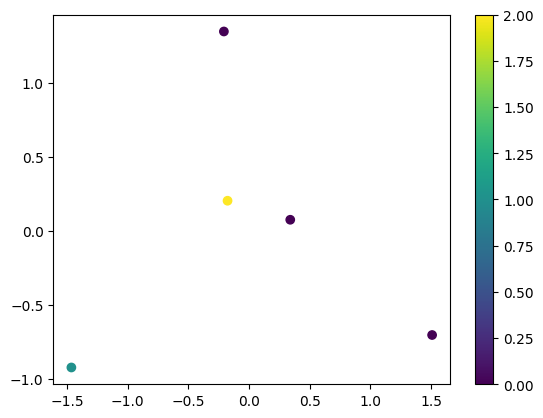

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=mac_donalds_data['Cluster'], cmap='viridis')
plt.colorbar()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, mac_donalds_data['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: -0.03307767285343059
